In [1]:
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import re

df_reddit = pd.read_csv('redditdaten.csv',index_col=0)

print("Test")
#df_reddit.to_csv('redditdaten.csv')

Test


In [6]:
def generateWordcloudSpecific(df, coin):
    tags = ''
    fig=plt.figure(figsize=(8,8))
    for data in df[df[coin]]['selftext']:
        val = str(data)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        tags += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800,height=600,background_color='white',min_font_size=10,stopwords=STOPWORDS)\
        .generate(tags)
    plt.imshow(wordcloud)
    plt.title(coin)
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()
def generateWordcloud(df):
    tags = ''
    fig=plt.figure(figsize=(8,8))
    for data in df['selftext']:
        val = str(data)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        tags += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800,height=600,background_color='white',min_font_size=10,stopwords=STOPWORDS)\
        .generate(tags)
    plt.imshow(wordcloud)
    plt.title('Allgemein')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()
def generateLineChartOfCoinMentions(df,coin):
    count = df[df[coin]]['created']
    count.value_counts().sort_index().plot.line(figsize= (15,7),grid=True,legend=True,label=coin,title="Entwicklung der Post-Anzahl")

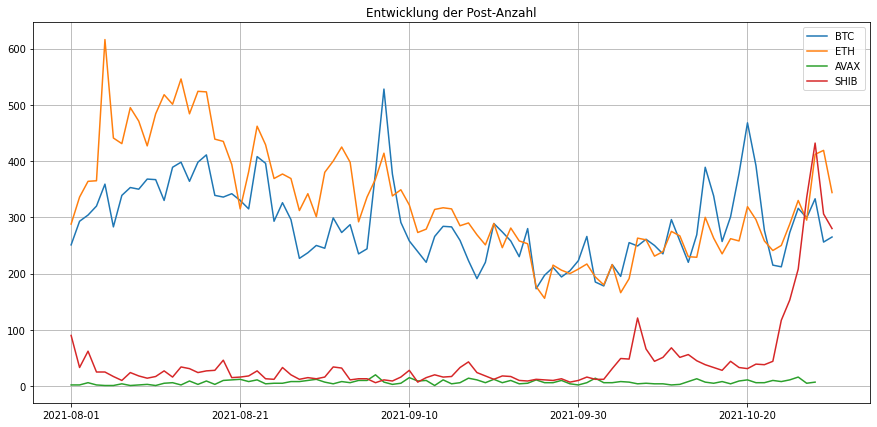

In [7]:
generateLineChartOfCoinMentions(df_reddit,'BTC')
generateLineChartOfCoinMentions(df_reddit,'ETH')
generateLineChartOfCoinMentions(df_reddit,'AVAX')
generateLineChartOfCoinMentions(df_reddit,'SHIB')

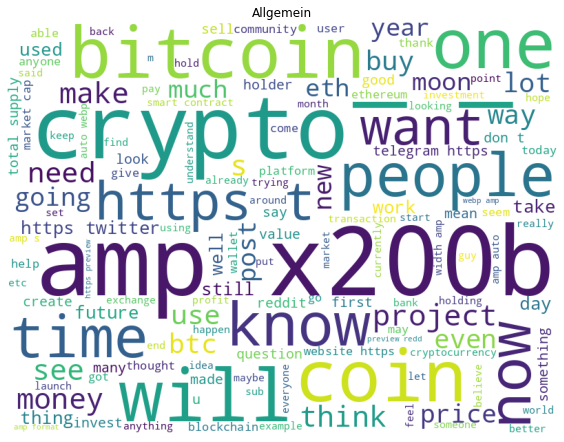

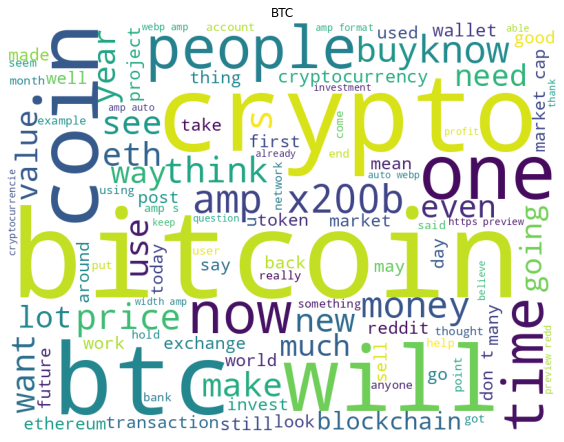

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/gt/jdb3508n4r96_3mk1mcjf5rc0000gn/T/ipykernel_8181/1834941835.py", line 3, in <module>
    generateWordcloudSpecific(df_reddit,'ETH')
  File "/var/folders/gt/jdb3508n4r96_3mk1mcjf5rc0000gn/T/ipykernel_8181/4154361191.py", line 11, in generateWordcloudSpecific
    wordcloud = WordCloud(width=800,height=600,background_color='white',min_font_size=10,stopwords=STOPWORDS)\
  File "/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py", line 632, in generate
    return self.generate_from_text(text)
  File "/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py", line 613, in generate_from_text
    words = self.process_text(text)
  File "/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py", line 588, in process_text
    word_counts = unigrams_and_bigrams(wo

TypeError: object of type 'NoneType' has no len()

<Figure size 576x576 with 0 Axes>

In [4]:
generateWordcloud(df_reddit)
generateWordcloudSpecific(df_reddit,'BTC')
generateWordcloudSpecific(df_reddit,'ETH')
generateWordcloudSpecific(df_reddit,'AVAX')
generateWordcloudSpecific(df_reddit,'SHIB')

In [ ]:
btcSent = df_reddit[df_reddit['BTC']]['Sentiment'].values
ethSent = df_reddit[df_reddit['ETH']]['Sentiment'].values
avaxSent = df_reddit[df_reddit['AVAX']]['Sentiment'].values
shibSent = df_reddit[df_reddit['SHIB']]['Sentiment'].values

data = [btcSent,ethSent,avaxSent,shibSent]
plt.boxplot(data,labels=['BTC','ETH','AVAX','SHIB'],sym="")
plt.ylabel("Sentiment")
plt.title("Sentiment zu Crypto")
plt.show()
